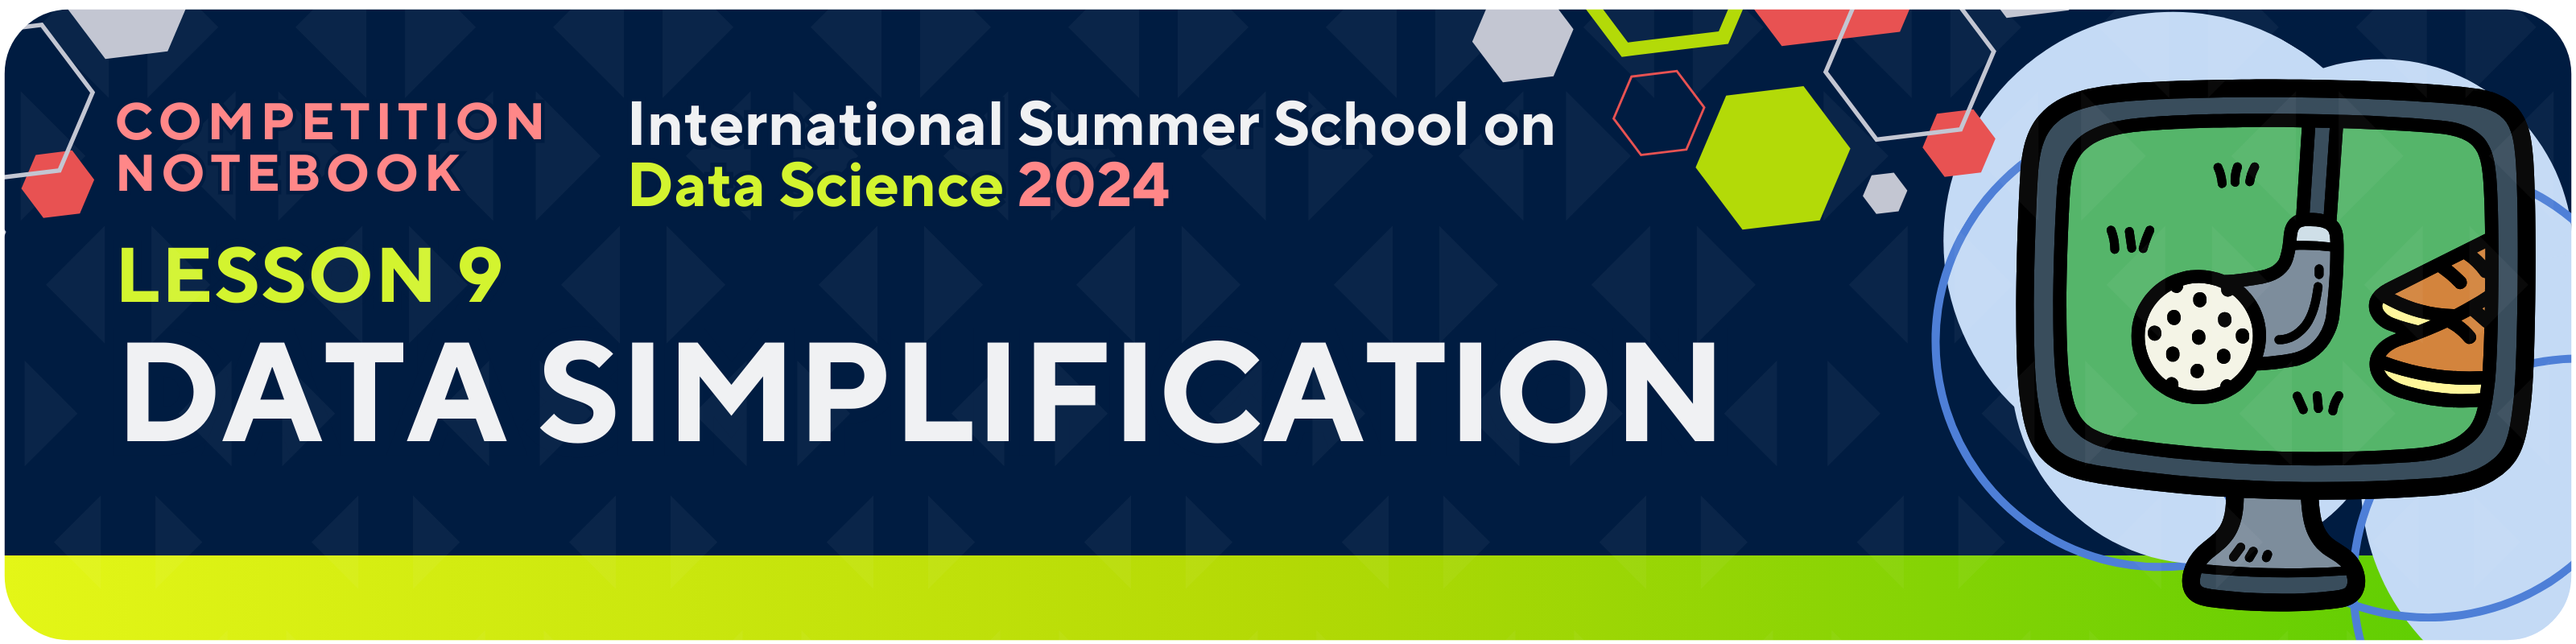


## **🎯      Goal**


Based on weather conditions of a day, predict the income of a lemonade stand.

<img src="https://i.imgur.com/XnA2SlZ.png" width=1200 />

## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from imblearn.pipeline       import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer

# Feature Selection/Reduction
from sklearn.feature_selection import RFE
from sklearn.decomposition     import PCA

# Modeling
from sklearn.dummy           import DummyRegressor
from sklearn.tree            import DecisionTreeRegressor

# Model Selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load Training Dataset**



In [ ]:
# Load Training Dataset
train_url = "https://www.dropbox.com/scl/fi/5bd9j03zv9ekj1kbrtrkf/train.csv?rlkey=42z7egu90973gk3l37ykaukt7&st=574826t0&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='Date')

df_train

,Day,DayOfTheWeek,Month,Year,Quarter,DayLength,Weekend,Temperature,ChanceOfRain,AtmosphericPressure,...,LemonadeStandMusic,LemonadeStandMascot,LemonadeStandSloganCatchiness,LemonadeStandUniform,LemonadeStandSignage,LemonadeStandSeating,NearbyCompetitorPresence,LemonadeStandDriveThru,ParentsAttendance,Income
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,4,1,2021,1,10.98,0,29.62,0.00,1005.59,...,Classical,Lemon,0.45,Apron,Neon,Benches,1,0,0,136.47
2021-01-02,2,5,1,2021,1,10.99,1,27.90,67.98,998.96,...,Classical,Lemon,0.39,Apron,Neon,Benches,0,0,0,99.43
2021-01-03,3,6,1,2021,1,10.99,1,26.28,0.00,1019.87,...,Classical,Lemon,0.86,Apron,Wooden,Benches,1,0,0,115.56
2021-01-04,4,0,1,2021,1,11.00,0,26.88,48.29,1008.62,...,Classical,Lemon,0.19,Apron,Chalkboard,Benches,1,0,0,68.18
2021-01-05,5,1,1,2021,1,11.00,0,29.01,92.88,984.47,...,Classical,Lemon,0.01,Apron,Chalkboard,Benches,1,0,1,54.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,27,1,12,2022,4,10.96,0,27.14,43.69,1004.96,...,Rock,Strawberry,0.44,Apron,Chalkboard,Tables,0,0,0,77.19
2022-12-28,28,2,12,2022,4,10.96,0,27.74,54.52,1000.49,...,Rock,Orange,0.63,Apron,Digital,Tables,0,0,0,115.53
2022-12-29,29,3,12,2022,4,10.97,0,27.51,71.31,1000.58,...,Rock,Strawberry,0.69,Apron,Digital,Tables,0,0,1,96.52


In [ ]:
df_train.columns

Index(['Day', 'DayOfTheWeek', 'Month', 'Year', 'Quarter', 'DayLength',
       'Weekend', 'Temperature', 'ChanceOfRain', 'AtmosphericPressure',
       'WindSpeed', 'Evaporation', 'WindDirection', 'Humidity', 'CloudCover',
       'Precipitation', 'Visibility', 'DewPoint', 'UVIndex', 'WindGusts',
       'LightningStrikes', 'AirQualityIndex', 'SolarRadiation', 'SoilMoisture',
       'BarometricTrend', 'GrassGrowth', 'FrostOccurrence',
       'LeafWetnessDuration', 'SolarNoonTime', 'AirTempVariation',
       'GroundTemperature', 'RelativeHumidity', 'AtmosphericStability',
       'TotalRainfall', 'MaxWindSpeed', 'SoilAcidity', 'SunshineDuration',
       'WaterTableDepth', 'PollutionIndex', 'InflationRate2011',
       'SpecialEvents', 'DailyCustomers', 'SupplierReliability',
       'FruitQuality', 'RecipeComplexity', 'RecipeEffectiveness',
       'LemonadeQuality', 'MaintenanceLevel', 'LemonadeStandCleanliness',
       'EquipmentEfficiency', 'StaffingLevel', 'LemonadeMade', 'FoodMade',
      


## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'Income'
X_train, y_train = df_train.drop(columns=target_col), df_train[target_col]

pd.Series(y_train)

,Income
Date,
2021-01-01,136.47
2021-01-02,99.43
2021-01-03,115.56
2021-01-04,68.18
2021-01-05,54.14
...,...
2022-12-27,77.19
2022-12-28,115.53
2022-12-29,96.52



## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore Data**


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2021-01-01 to 2022-12-31
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Day                            730 non-null    int64  
 1   DayOfTheWeek                   730 non-null    int64  
 2   Month                          730 non-null    int64  
 3   Year                           730 non-null    int64  
 4   Quarter                        730 non-null    int64  
 5   DayLength                      730 non-null    float64
 6   Weekend                        730 non-null    int64  
 7   Temperature                    730 non-null    float64
 8   ChanceOfRain                   730 non-null    float64
 9   AtmosphericPressure            730 non-null    float64
 10  WindSpeed                      730 non-null    float64
 11  Evaporation                    730 non-null    float64
 12  WindDirection                  730 non-


## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing & Feature Selection/Reduction**


In [ ]:
# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
estimator = DecisionTreeRegressor()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(estimator, n_features_to_select=30)),
    #('reducer', PCA(n_components=4)),
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 ['ohe__LemonadeStandTheme_Tropical' 'std__Month' 'std__Temperature'
 'std__ChanceOfRain' 'std__WindSpeed' 'std__WindDirection'
 'std__CloudCover' 'std__Visibility' 'std__GrassGrowth'
 'std__SolarNoonTime' 'std__AirTempVariation' 'std__GroundTemperature'
 'std__TotalRainfall' 'std__PollutionIndex' 'std__InflationRate2011'
 'std__FruitQuality' 'std__RecipeEffectiveness'
 'std__LemonadeStandCleanliness' 'std__LemonadeMade' 'std__ServiceQuality'
 'std__CustomerSatisfaction' 'std__CustomerFeedbackScore'
 'std__AdvertisingBudget' 'std__AdvertisingEffectiveness'
 'std__Decorations' 'std__LemonadeStandAmbiance' 'std__FootTraffic'
 'std__LocationQuality' 'std__CustomerWaitTime'
 'std__LemonadeStandSloganCatchiness']



## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Training Pipeline**



In [ ]:
from sklearn.ensemble import AdaBoostRegressor

training_pipeline = Pipeline([
    ('regressor', AdaBoostRegressor(random_state=42))
])

training_pipeline


Pipeline(steps=[('regressor', AdaBoostRegressor(random_state=42))])


## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
# # Define parameter distributions
# param_dist = {
#     'regressor__constant': np.arange(100, 300),
# }

# # Perform randomized Search
# random_search = RandomizedSearchCV(training_pipeline,
#                                    param_distributions=param_dist,
#                                    scoring='neg_root_mean_squared_error',
#                                    verbose=3)
# random_search.fit(X_train_selected, y_train)

# # Print best parameter and score
# print("Best Parameters:")
# print(pd.Series(random_search.best_params_))
# print("\nBest Cross-Validation RMSE:")
# print(f"{-random_search.best_score_:.4} ± {2*np.std(random_search.cv_results_['mean_test_score']):.4}")

In [ ]:
param_dist = {
    'regressor__n_estimators': np.arange(50, 300),  # Number of estimators for AdaBoost
    'regressor__learning_rate': np.linspace(0.01, 1.0, 100),  # Learning rate for AdaBoost
    'regressor__loss': ['linear', 'square', 'exponential']  # Loss function
}
# Perform randomized search on the AdaBoostRegressor within the pipeline
random_search = RandomizedSearchCV(training_pipeline,
                                   param_distributions=param_dist,
                                   scoring='neg_root_mean_squared_error',
                                   verbose=3,
                                   n_iter=10,  # Number of iterations for RandomizedSearch
                                   n_jobs=-1,
                                   cv=5,
                                   random_state=42)

random_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('regressor',
                                              AdaBoostRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'regressor__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0....
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=3)


## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# SAVE & FIT BEST MODEL

best_model = random_search.best_estimator_
best_model.fit(X_train_selected, y_train)

best_model

Pipeline(steps=[('regressor',
                 AdaBoostRegressor(learning_rate=0.74, n_estimators=186,
                                   random_state=42))])


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load the Testset & Predict**



In [ ]:
# Load the test data
test_url = "https://www.dropbox.com/scl/fi/phi9r0sd8elg1p7yo5sm4/test.csv?rlkey=mftkrmyad1autx1g2nfjes8tt&st=gayqrfmi&dl=0&raw=1"
X_test = pd.read_csv(test_url, index_col='Date')

# Perform feature selection and preprocessing on test data
X_test_selected = feature_selection_pipeline.transform(X_test)

# Predict on the test data
y_pred = best_model.predict(X_test_selected)

pd.Series(y_pred)

,0
0,150.282022
1,126.384390
2,92.657162
3,109.784187
4,91.135311
...,...
360,122.460114
361,170.532476
362,114.827938
363,182.932335



## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Convert prediction into DataFrame
submission = pd.DataFrame(y_pred, index=X_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('submission.csv')

submission

,Income
Date,
2023-01-01,150.282022
2023-01-02,126.384390
2023-01-03,92.657162
2023-01-04,109.784187
2023-01-05,91.135311
...,...
2023-12-27,122.460114
2023-12-28,170.532476
2023-12-29,114.827938


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>